# Capstone Project: Accident Severity Prediction

### Introduction / Business Problem
The City Municipality of Seattle (target audience) is facing a deficiency in the budget that is dedicated to addressing damage caused by car accidents, budget is mainly used for covering the cost of both human (health) recovery and property damage. One of the areas the city can improve within is the deployment and allocation of resources, it has been identified that resources have been deployed in situations where they couldn't add value in remediating or controlling the damage caused by car accidents. For example, medical staff such as EMT's cannot add value if there are no human injuries caused by an accident, therefore deploying them to the accident location is a waste of resource usage.

### Goal
The Municipality of Seattle’s main goal is to allocate medical and natural damage control resources more efficiently and effectively based on the predicted severity type of an accident. If an accident severity is level 2 (human injuries outcome of an accident), then more medical resources such as ambulances & EMT's can be deployed. If an accident severity is level 1 (property damage outcome of an accident), then more of resources that address controlling damage caused by natural factors (tornadoes, storms, etc.) to physical property such as firefighters can be deployed.

### Data Overview and Usage
The Dataset is owned by the Settle Department of Transportation who will grant Seattle's Municipality access to it, it's made up of 38 columns, 194673 rows, and comprises of attributes that describe existing features of when car accidents occurred and outcomes caused by such accidents. 
Data will serve as an input to build a machine learning mechanism that predicts the severity type of an accident based on key factors causing the accident. The key factors are either human behavior or natural events causing the accidents. Human behavior factors are Drivers' Under the Influence, Speeding, & Not Granting Right of Way to a Pedestrian; these will serve as the X (independent) variables. Natural events factor entails the Weather Condition attribute, which will also serve as an X (independent) variable.
The Y (dependent) variable will be the severity type since we are trying to predict it.
If the severity level can be predicted, then the city can allocate appropriate emergency staff for efficiently addressing the damage caused by the car accident.




### Resources 
Raw Data: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv 

Balancing Datasets: 

https://elitedatascience.com/imbalanced-classes

https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28

# Libraries

In [1]:
# Libraries
# Dataframes, arrays, and graphing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Modeling related libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

# Data Pre-Processing

In [2]:
#download data
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-05 21:58:31--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  22.3MB/s    in 3.2s    

2020-09-05 21:58:35 (21.7 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [2]:
# read data
df = pd.read_csv('Data-Collisions.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
#Exploring data: size and data types 
print("size:",df.shape)
print(df.dtypes)

size: (194673, 38)
SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       

In [5]:
# X attributes input to Model(s): UNDERINFL (object), SPEEDING (object), PEDROWNOTGRNT (object), WEATHER (object)
# Y attribute to predict via Model(s): SEVERITYCODE (int64)

In [6]:
# Exploring X features
print("UNDERINFL:",df.UNDERINFL.unique())
print("SPEEDING:",df.SPEEDING.unique())
print("PEDROWNOTGRNT:",df.PEDROWNOTGRNT.unique())
print("WEATHER:",df.WEATHER.unique())

UNDERINFL: ['N' '0' nan '1' 'Y']
SPEEDING: [nan 'Y']
PEDROWNOTGRNT: [nan 'Y']
WEATHER: ['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']


In [7]:
# Exploring Y features
df.SEVERITYCODE.unique()

array([2, 1])

## Normal / Unbalanced Dataset


In [8]:
# Fixing X features
# UNDERINFL: Replace 1's with Y, replace blanks & 0's with N b/c the goal here is to identify if the driver was under the influence of a substance, the substance type doesn't matter
# SPEEDING, PEDROWNOTGRNT: Replace blanks with N, assume blanks mean these weren't factors in the associated observations 
# WEATHER: Replace blanks with Unknown, assume weather condidtion wasn't known for the associated observations

df_amended = df
df_amended['UNDERINFL'].replace("1","Y", inplace=True)
df_amended['UNDERINFL'].replace("0","N", inplace=True)
df_amended['UNDERINFL'].replace(np.nan,"N", inplace=True)

df_amended['SPEEDING'].replace(np.nan,"N", inplace=True)
df_amended['WEATHER'].replace(np.nan,"Unknown", inplace=True)
df_amended['PEDROWNOTGRNT'].replace(np.nan,"N", inplace=True)

# Quality Check: Ensure replacement actions worked 
print(df_amended.UNDERINFL.unique())
print(df_amended.SPEEDING.unique())
print(df_amended.PEDROWNOTGRNT.unique())
print(df_amended.WEATHER.unique())

# Keeping track of dataframe shape 
print("--------------------------")
print("df_amended shape:",df_amended.shape)

['N' 'Y']
['N' 'Y']
['N' 'Y']
['Overcast' 'Raining' 'Clear' 'Unknown' 'Other' 'Snowing' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']
--------------------------
df_amended shape: (194673, 38)


In [9]:
#--------------------------------------------

## Balancing Dataset

In [10]:
# Balance Dataset
# serverity code 1 dominates the dataset
df_amended['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [11]:
# Balance Dataset: Downsample Majority Class
# Reduce number of dominant class observations randomly 

# Separate majority and minority classes
df_amended_majority = df_amended[['SEVERITYCODE','UNDERINFL', 'SPEEDING', 'PEDROWNOTGRNT', 'WEATHER']]
df_amended_majority = df_amended_majority[df_amended_majority.SEVERITYCODE==1]

df_amended_minority = df_amended[['SEVERITYCODE','UNDERINFL', 'SPEEDING', 'PEDROWNOTGRNT', 'WEATHER']]
df_amended_minority = df_amended_minority[df_amended_minority.SEVERITYCODE==2]

# Ensure segregation occured
print("majority df:", df_amended_majority.shape)
print("minority df:", df_amended_minority.shape)


majority df: (136485, 5)
minority df: (58188, 5)


In [12]:
# Balance Dataset: Downsample Majority Class
# Create DF with downsized observations 
df_amended_majority_downsampled = resample(df_amended_majority, replace=False, n_samples=58188,random_state=123)

# Confirm observations count of majority class reduced 
df_amended_majority_downsampled.shape

(58188, 5)

In [13]:
# Balance Dataset: Downsample Majority Class
# Downsized Sample DF - Combine minority with downsampled majority class 
df_downsampled = pd.concat([df_amended_majority_downsampled, df_amended_minority])

# Verify dataset balanced
df_downsampled.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [14]:
# # One Hot Encoding & Transforming
# X array
# X with normal / unbalanced dataset
X = df_amended[['UNDERINFL', 'SPEEDING', 'PEDROWNOTGRNT', 'WEATHER']]
# X with balanced dataset (down-sampled)
X_balanced = df_downsampled[['UNDERINFL', 'SPEEDING', 'PEDROWNOTGRNT', 'WEATHER']]


# Encode each X feature 
le_UNDERINFL = preprocessing.LabelEncoder()
le_UNDERINFL.fit(['Y','N'])
# X with normal dataset
X.iloc[:,0] = le_UNDERINFL.transform(X.iloc[:,0]) 
# X with balanced dataset
X_balanced.iloc[:,0] = le_UNDERINFL.transform(X_balanced.iloc[:,0]) 

le_SPEEDING = preprocessing.LabelEncoder()
le_SPEEDING.fit(['Y','N'])
# X with normal dataset
X.iloc[:,1] = le_SPEEDING.transform(X.iloc[:,1])
# X with balanced dataset
X_balanced.iloc[:,1] = le_SPEEDING.transform(X_balanced.iloc[:,1])

le_PEDROWNOTGRNT = preprocessing.LabelEncoder()
le_PEDROWNOTGRNT.fit(['Y','N'])
# X with normal dataset
X.iloc[:,2] = le_PEDROWNOTGRNT.transform(X.iloc[:,2])
# X with balanced dataset
X_balanced.iloc[:,2] = le_PEDROWNOTGRNT.transform(X_balanced.iloc[:,2])

le_WEATHER = preprocessing.LabelEncoder()
le_WEATHER.fit(['Overcast','Raining','Clear','Unknown','Other','Snowing','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'])
# X with normal dataset
X.iloc[:,3] = le_WEATHER.transform(X.iloc[:,3])
# X with balanced dataset
X_balanced.iloc[:,3] = le_WEATHER.transform(X_balanced.iloc[:,3])

# #y array 
# y with normal dataset
y = df_amended["SEVERITYCODE"]
# y with balanced data set (down-sampled)
y_balanced = df_downsampled["SEVERITYCODE"]


# Quality Check: Ensure row count of X and y are equal
print("X with normal dataset shape:", X.shape)
print("y with normal dataset shape:", y.shape)
print("X with balanced dataset shape:", X_balanced.shape)
print("y with balanced dataset shape:", y_balanced.shape)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


X with normal dataset shape: (194673, 4)
y with normal dataset shape: (194673,)
X with balanced dataset shape: (116376, 4)
y with balanced dataset shape: (116376,)


In [15]:
# Display samples from transformed X (normal data)
X.head()

,UNDERINFL,SPEEDING,PEDROWNOTGRNT,WEATHER
0,0,0,0,4
1,0,0,0,6
2,0,0,0,4
3,0,0,0,1
4,0,0,0,6


In [16]:
# Depedent (y) variable with normal data
y.head()

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

# Model: Decision Tree with normal (unbalanced) dataset

In [17]:
#Split Data: Test & Train 
# Use in all models
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Create Model
# tree = DecisionTreeClassifier(criterion="entropy")
tree = DecisionTreeClassifier(criterion="gini")
tree 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
# Fit / Train Model
tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
# Predict
yhat_tree = tree.predict(X_testset)
yhat_tree[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
# Evaluate
fscore_tree = metrics.f1_score(y_testset, yhat_tree, average='weighted')
jaccard_tree = metrics.jaccard_similarity_score(y_testset, yhat_tree)
print("F1-Score:",fscore_tree)
print("Jaccard Index:",jaccard_tree)

F1-Score: 0.6304290300738228
Jaccard Index: 0.7234683743707407


In [46]:
# X features importance
feature_names = X.columns
importance_un_DT= sorted(zip(tree.feature_importances_, feature_names), reverse=True)
importance_un_DT

[(0.626888666113754, 'PEDROWNOTGRNT'),
 (0.3298150506678249, 'WEATHER'),
 (0.02427228733607007, 'UNDERINFL'),
 (0.01902399588235101, 'SPEEDING')]

In [80]:
# Df of X features importance 
importance_un_DT_df = pd.DataFrame(importance_un_DT, columns =['Score','Feature'])
importance_un_DT_df['Model_Dataset'] = 'DT_Unbalanced'
importance_un_DT_df

,Score,Feature,Model_Dataset
0,0.626889,PEDROWNOTGRNT,DT_Unbalanced
1,0.329815,WEATHER,DT_Unbalanced
2,0.024272,UNDERINFL,DT_Unbalanced
3,0.019024,SPEEDING,DT_Unbalanced


# Model: Random Forest with normal (unbalanced) dataset

In [41]:
# Split data: already completed in the Decision Tree Model

In [42]:
# Create Model
rf = RandomForestClassifier(n_estimators=200)

In [43]:
# Fit / Train Model
rf = rf.fit(X_trainset, y_trainset)

In [44]:
# Predict
yhat_rf = rf.predict(X_testset)
yhat_rf[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
# Evaluate
fscore_rf = metrics.f1_score(y_testset, yhat_rf, average='weighted')
jaccard_rf = metrics.jaccard_similarity_score(y_testset, yhat_rf)
print("F1-Score:",fscore_rf)
print("Jaccard Index:",jaccard_rf)

F1-Score: 0.6304641987130116
Jaccard Index: 0.723485497072018


In [48]:
# X features importance
importance_un_RF = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
importance_un_RF

[(0.6131561278306045, 'PEDROWNOTGRNT'),
 (0.33780817786348494, 'WEATHER'),
 (0.027630964858223472, 'UNDERINFL'),
 (0.02140472944768689, 'SPEEDING')]

In [79]:
# Df of X features importance 
importance_un_RF_df = pd.DataFrame(importance_un_RF, columns =['Score','Feature']) 
importance_un_RF_df['Model_Dataset'] = 'RF_Unbalanced'
importance_un_RF_df

,Score,Feature,Model_Dataset
0,0.613156,PEDROWNOTGRNT,RF_Unbalanced
1,0.337808,WEATHER,RF_Unbalanced
2,0.027631,UNDERINFL,RF_Unbalanced
3,0.021405,SPEEDING,RF_Unbalanced


# Model: Logistic Regression with normal (unbalanced) dataset

In [113]:
# Split data: already completed in the Decision Tree Model

In [114]:
# Create Model 
LR = LogisticRegression(C=0.1, solver='liblinear')
LR

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [115]:
# Train / Fit Model 
LR.fit(X_trainset,y_trainset)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [116]:
# Make Predictions 
yhat_LR = LR.predict(X_testset)
yhat_LR[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [117]:
# Evaluate
fscore_LR = metrics.f1_score(y_testset, yhat_LR, average='weighted')
jaccard_LR = metrics.jaccard_similarity_score(y_testset, yhat_LR)
print("F1-Score:",fscore_LR)
print("Jaccard Index:",jaccard_LR)

F1-Score: 0.6304044542067013
Jaccard Index: 0.7234683743707407


# Model: Knn with normal (unbalanced) dataset

In [118]:
# Split data: already completed in the Decision Tree Model

In [119]:
# Create Model 
k=9
neigh = KNeighborsClassifier(n_neighbors = k)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [120]:
# Train / Fit Model 
neigh.fit(X_trainset,y_trainset)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [121]:
# Make Predictions 
yhat_Knn = neigh.predict(X_testset)
yhat_Knn[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [122]:
fscore_Knn = metrics.f1_score(y_testset, yhat_Knn, average='weighted')
jaccard_Knn = metrics.jaccard_similarity_score(y_testset, yhat_Knn)
print("F1-Score:",fscore_Knn)
print("Jaccard Index:",jaccard_Knn)

F1-Score: 0.6396053094099318
Jaccard Index: 0.7150953734461148


# Model: SVM with normal (unbalanced) dataset

In [123]:
# Split data: already completed in the Decision Tree Model

In [124]:
# Create Model
# clf = svm.SVC(C=0.1, kernel='rbf')
clf = svm.SVC(kernel='linear')
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [125]:
# Train / Fit Model 
clf.fit(X_trainset, y_trainset) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [126]:
# Make Predictions 
yhat_svm = clf.predict(X_testset)
yhat_svm [0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [127]:
fscore_svm = metrics.f1_score(y_testset, yhat_svm, average='weighted')
jaccard_svm = metrics.jaccard_similarity_score(y_testset, yhat_svm)
print("F1-Score:",fscore_svm )
print("Jaccard Index:", jaccard_svm)

F1-Score: 0.6280991299176927
Jaccard Index: 0.723725214889901


# Model: Decision Tree with balanced dataset

In [51]:
#Split Data: Test & Train 
# Use in all models
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

In [52]:
# Create Model
tree_b = DecisionTreeClassifier(criterion="gini")
tree_b 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
# Fit / Train Model
tree_b.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
# Predict
yhat_tree_b = tree.predict(X_test)
yhat_tree_b[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
# Evaluate
fscore_tree_b = metrics.f1_score(y_test, yhat_tree_b, average='weighted')
jaccard_tree_b = metrics.jaccard_similarity_score(y_test, yhat_tree_b)
print("F1-Score:", fscore_tree_b)
print("Jaccard Index:", jaccard_tree_b)

F1-Score: 0.41748673636185774
Jaccard Index: 0.5404290665368201


In [56]:
# X features importance
feature_names_b = X_balanced.columns
importance_b_DT = sorted(zip(tree_b.feature_importances_, feature_names_b), reverse=True)
importance_b_DT

[(0.5184840006688883, 'WEATHER'),
 (0.4467228205388238, 'PEDROWNOTGRNT'),
 (0.01972996249630891, 'UNDERINFL'),
 (0.015063216295979084, 'SPEEDING')]

In [81]:
# Df of X features importance 
importance_b_DT_df= pd.DataFrame(importance_b_DT, columns =['Score','Feature'])
importance_b_DT_df['Model_Dataset'] = 'DT_Balanced'
importance_b_DT_df

,Score,Feature,Model_Dataset
0,0.518484,WEATHER,DT_Balanced
1,0.446723,PEDROWNOTGRNT,DT_Balanced
2,0.019730,UNDERINFL,DT_Balanced
3,0.015063,SPEEDING,DT_Balanced


# Model: Random Forest with balanced dataset

In [58]:
#Split Data: Test & Train
# Already completed in the Decision Tree model 

In [59]:
# Create Model
rf_b = RandomForestClassifier(n_estimators=200)

In [60]:
# Fit / Train Model
rf_b.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
# Predict
yhat_rf_b = rf.predict(X_test)
yhat_rf_b[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
# Evaluate
fscore_rf_b = metrics.f1_score(y_test, yhat_rf_b, average='weighted')
jaccard_rf_b = metrics.jaccard_similarity_score(y_test, yhat_rf_b)
print("F1-Score:", fscore_rf_b)
print("Jaccard Index:", jaccard_rf_b)

F1-Score: 0.41748673636185774
Jaccard Index: 0.5404290665368201


In [64]:
# X features importance
feature_names_b = X_balanced.columns
importance_b_RF= sorted(zip(rf_b.feature_importances_, feature_names_b), reverse=True)
importance_b_RF 

[(0.49800049834463644, 'WEATHER'),
 (0.460887189713228, 'PEDROWNOTGRNT'),
 (0.02265665047433484, 'UNDERINFL'),
 (0.018455661467800887, 'SPEEDING')]

In [82]:
# Df of X features importance 
importance_b_RF_df= pd.DataFrame(importance_b_RF, columns =['Score','Feature'])
importance_b_RF_df['Model_Dataset'] = 'RF_Balanced'
importance_b_RF_df

,Score,Feature,Model_Dataset
0,0.498000,WEATHER,RF_Balanced
1,0.460887,PEDROWNOTGRNT,RF_Balanced
2,0.022657,UNDERINFL,RF_Balanced
3,0.018456,SPEEDING,RF_Balanced


# Model: Logistic Regression with balanced dataset

In [140]:
#Split Data: Test & Train
# Already completed in the Decision Tree model 

In [141]:
# Create Model 
LR_b = LogisticRegression(C=0.1, solver='liblinear')
LR_b

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [142]:
# Train / Fit Model 
LR_b.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [143]:
# Make Predictions
yhat_LR_b = LR_b.predict(X_test)
yhat_LR_b[0:10]

array([1, 1, 2, 1, 2, 2, 1, 2, 2, 2])

In [144]:
# Evaluate
fscore_LR_b = metrics.f1_score(y_test, yhat_LR_b, average='weighted')
jaccard_LR_b = metrics.jaccard_similarity_score(y_test, yhat_LR_b)
print("F1-Score:", fscore_LR_b)
print("Jaccard Index:", jaccard_LR_b)

F1-Score: 0.5416371164053428
Jaccard Index: 0.5494801363388996


# Model: Knn with balanced dataset

In [145]:
#Split Data: Test & Train
# Already completed in the Decision Tree model 

In [146]:
# Create Model 
k=9
neigh_b = KNeighborsClassifier(n_neighbors = k)
neigh_b

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [147]:
# Train / Fit Model 
neigh_b.fit(X_train,y_train)
neigh_b

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [148]:
# Make Predictions 
yhat_Knn_b = neigh.predict(X_test)
yhat_Knn_b[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [149]:
# Evaluate
fscore_Knn_b = metrics.f1_score(y_test, yhat_Knn_b, average='weighted')
jaccard_Knn_b = metrics.jaccard_similarity_score(y_test, yhat_Knn_b)
print("F1-Score:", fscore_Knn_b)
print("Jaccard Index:", jaccard_Knn_b)

F1-Score: 0.4463902679941887
Jaccard Index: 0.5461862343539655


# Model: SVM with balanced dataset

In [150]:
#Split Data: Test & Train
# Already completed in the Decision Tree model 

In [151]:
# Create Model
clf_b = svm.SVC(kernel='linear')
clf_b

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [152]:
# Train / Fit Model 
clf_b.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [153]:
# Make Predictions 
yhat_svm_b = clf_b.predict(X_test)
yhat_svm_b [0:10]

array([1, 1, 2, 2, 2, 2, 1, 2, 2, 2])

In [154]:
# Evaluate
fscore_svm_b = metrics.f1_score(y_test, yhat_svm_b, average='weighted')
jaccard_svm_b = metrics.jaccard_similarity_score(y_test, yhat_svm_b)
print("F1-Score:", fscore_svm_b)
print("Jaccard Index:", jaccard_svm_b)

F1-Score: 0.5102462857203012
Jaccard Index: 0.5393406467504941


# Results / Summary

### Accuracy Scores 

In [170]:
# Dictionary and DF hosting accuracy scores 
# Both Balanced and Unbalanced Datasets input 

# Dictionary
scores_dict = {'Decision_Tree':[fscore_tree, jaccard_tree, fscore_tree_b, jaccard_tree_b], "Random_Forest":[fscore_rf, jaccard_rf, fscore_rf_b, jaccard_rf_b], "Logistic_Regression": [fscore_LR, jaccard_LR, fscore_LR_b, jaccard_LR_b], "Knn":[fscore_Knn, jaccard_Knn, fscore_Knn_b, jaccard_Knn_b], "SVM":[fscore_svm, jaccard_svm, fscore_svm_b, jaccard_svm_b]}

# DF
scores_df = pd.DataFrame.from_dict(scores_dict, orient='index',columns=['Fscore_Unbalanced','Jaccard_Unbalanced', 'Fscore_Balanced', 'Jaccard_Balanced'])
scores_df

,Fscore_Unbalanced,Jaccard_Unbalanced,Fscore_Balanced,Jaccard_Balanced
Decision_Tree,0.630429,0.723468,0.417487,0.540429
Random_Forest,0.630464,0.723485,0.417487,0.540429
Logistic_Regression,0.630404,0.723468,0.541637,0.549480
Knn,0.639605,0.715095,0.446390,0.546186
SVM,0.628099,0.723725,0.510246,0.539341


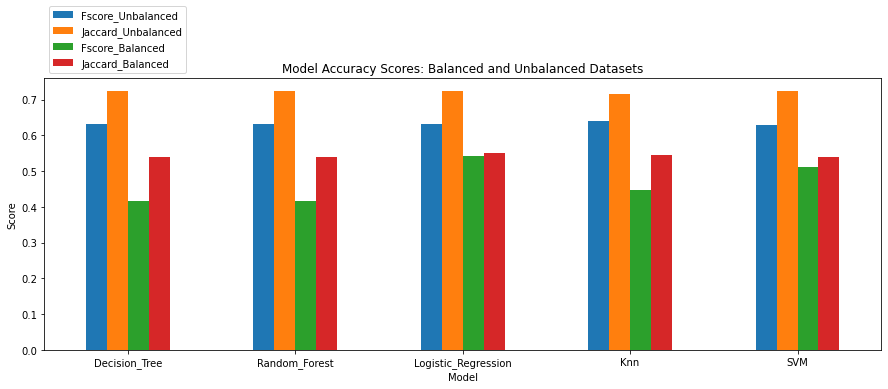

In [192]:
# Accuracy Scores Visualization
scores_df.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Model') 
plt.ylabel('Score') # add y-label to the plot
plt.title('Model Accuracy Scores: Balanced and Unbalanced Datasets') 
plt.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=1)
plt.xticks(rotation=360)
plt.show()

### Features Importance Scores 

In [101]:
# Combine df's created in respective models
combine = [importance_un_DT_df, importance_un_RF_df, importance_b_DT_df, importance_b_RF_df]
importance_all = pd.concat(combine)
importance_all

,Score,Feature,Model_Dataset
0,0.626889,PEDROWNOTGRNT,DT_Unbalanced
1,0.329815,WEATHER,DT_Unbalanced
2,0.024272,UNDERINFL,DT_Unbalanced
3,0.019024,SPEEDING,DT_Unbalanced
0,0.613156,PEDROWNOTGRNT,RF_Unbalanced
1,0.337808,WEATHER,RF_Unbalanced
2,0.027631,UNDERINFL,RF_Unbalanced
3,0.021405,SPEEDING,RF_Unbalanced
0,0.518484,WEATHER,DT_Balanced
1,0.446723,PEDROWNOTGRNT,DT_Balanced


In [99]:
# Df of average importance score per feature across the 2 models and 2 dataset types
# recap: 2 models are Decision Tree and Random Forests and the dataset types are balanced & unbalanced
importance_feature_average= importance_all.groupby(['Feature']).mean()
importance_feature_average

,Score
Feature,
PEDROWNOTGRNT,0.536914
SPEEDING,0.018487
UNDERINFL,0.023572
WEATHER,0.421027


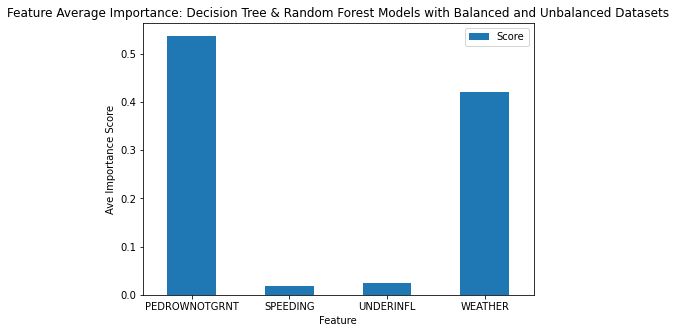

In [106]:
# Visualization of feature average importance scores 
importance_feature_average.plot(kind='bar', figsize=(7, 5))
plt.xlabel('Feature') 
plt.ylabel('Ave Importance Score') 
plt.title('Feature Average Importance: Decision Tree & Random Forest Models with Balanced and Unbalanced Datasets') 
plt.xticks(rotation=360)
plt.show()